In [8]:
import pickle

with open('100.pickle', 'rb') as handle:
    one = pickle.load(handle)
with open('200.pickle', 'rb') as handle:
    two = pickle.load(handle)
with open('300.pickle', 'rb') as handle:
    three = pickle.load(handle)
with open('400.pickle', 'rb') as handle:
    four = pickle.load(handle)
with open('500.pickle', 'rb') as handle:
    five = pickle.load(handle)


In [9]:
def Merge(dict1, dict2): 
    return(dict2.update(dict1))

In [13]:
Merge(five, one)

In [14]:
final = one

In [16]:
len(one)

385

In [23]:
def get_cm_id(search_dict):
    isrc_dict = {}
    for k, v in search_dict.items():
        try:
            obj_ind = v['obj']
            if not obj_ind['tracks']:
                pass
            else:
                cm_id = obj_ind['tracks'][0]['id']
                name_of_song = v["obj"]["tracks"][0]["name"]
                isrc_dict[name_of_song] = dict(cm_id=cm_id, isrc=k)
    #         time.sleep(5)
        except TypeError:
            print(f'{k} not found')
#             time.sleep(5)

    return isrc_dict
new_stuff = get_cm_id(final)

In [24]:
new_stuff = get_cm_id(final)

USAT21802943 not found
USAT21802903 not found
USAT21802930 not found
GBAYE1800627 not found
GBAHS1800467 not found
USAT21802940 not found
USAT21802937 not found
USAT21802927 not found
USAT21802936 not found
USAT21802928 not found
USAT21802932 not found
GBAYE1800628 not found
USAT21802934 not found
USAT21802926 not found
USAT21802925 not found
USAT21802924 not found
USAT21802929 not found
USAT21802941 not found
USAT21802945 not found
GBAHS1800472 not found
USAT21802952 not found
USAT21802939 not found
USAT21802923 not found
USAT21802902 not found
USAT21802901 not found
USAT21802954 not found
USAT21802947 not found
USAT21802948 not found
CHB701800116 not found
USAT21700504 not found
CHB701800115 not found
CHB701800114 not found
USAT21810519 not found
USAT21810520 not found
CHB701800117 not found
GBAHS1900274 not found
GBAHS1900896 not found
GBAHS1900898 not found
GBAHS1900890 not found
GBAHS1900272 not found
GBAHS1900899 not found
GBAHS1900273 not found
GBAHS1900900 not found
USAT2190106

In [ ]:
import random
random.choice(list(new_stuff.keys()))

In [26]:
from client import Chartmetric
from config import chartmetric_token
import time
cm = Chartmetric(chartmetric_token)
from tqdm import tqdm
song_data_dict = {}
for k, v in tqdm(new_stuff.items()):
    song_data_dict[k] = cm.track(str(v['cm_id']))
    time.sleep(4)

 88%|████████▊ | 270/306 [23:54<04:33,  7.60s/it] 

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [27]:
len(song_data_dict)

270

In [28]:
import pandas as pd
import numpy as np
song_features_dict = {} 
for k, v in song_data_dict.items():
    song_features_dict[k] = v['obj']['cm_audio_features']
feature_df = pd.DataFrame.from_dict(song_features_dict).T
feature_df.drop(columns=["key", "loudness", "mode", "tempo"], inplace=True)

In [29]:
def sim_function(x, y):
    return 1. / (1. + np.linalg.norm(x - y, 2))

In [30]:
n = len(feature_df.dropna())
sim_song = {}
X = np.zeros((n, 7))

for i in range(n):
    X[i] = feature_df.dropna().iloc[i]
    
for i in range(n):
    x = feature_df.dropna().iloc[i]
    sim_song[x.name] = 0
    buffer = 0
    for j in range(n):
        if i == j:
            continue
            
        y = feature_df.dropna().iloc[j]
        
        sim = sim_function(x, y)
        if sim > buffer:
            sim_song[x.name] = y.name
            buffer = sim

In [31]:
def get_n_most_similar_songs(n, track_name):
    

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence
Ms. Jackson,0.199,0.838,0.837,0,0.0914,0.275,0.693
Savage (feat. Flux Pavillion & MAX),0.151,0.679,0.662,0,0.376,0.0773,0.357
It's Tricky,0.00685,0.966,0.954,0,0.0869,0.229,0.962
Classic (feat. POWERS) - RAC Remix,0.00456,0.647,0.776,0.0261,0.0535,0.0466,0.555
Did You Wrong (feat. MAX),0.134,0.596,0.746,1.01e-06,0.299,0.076,0.473


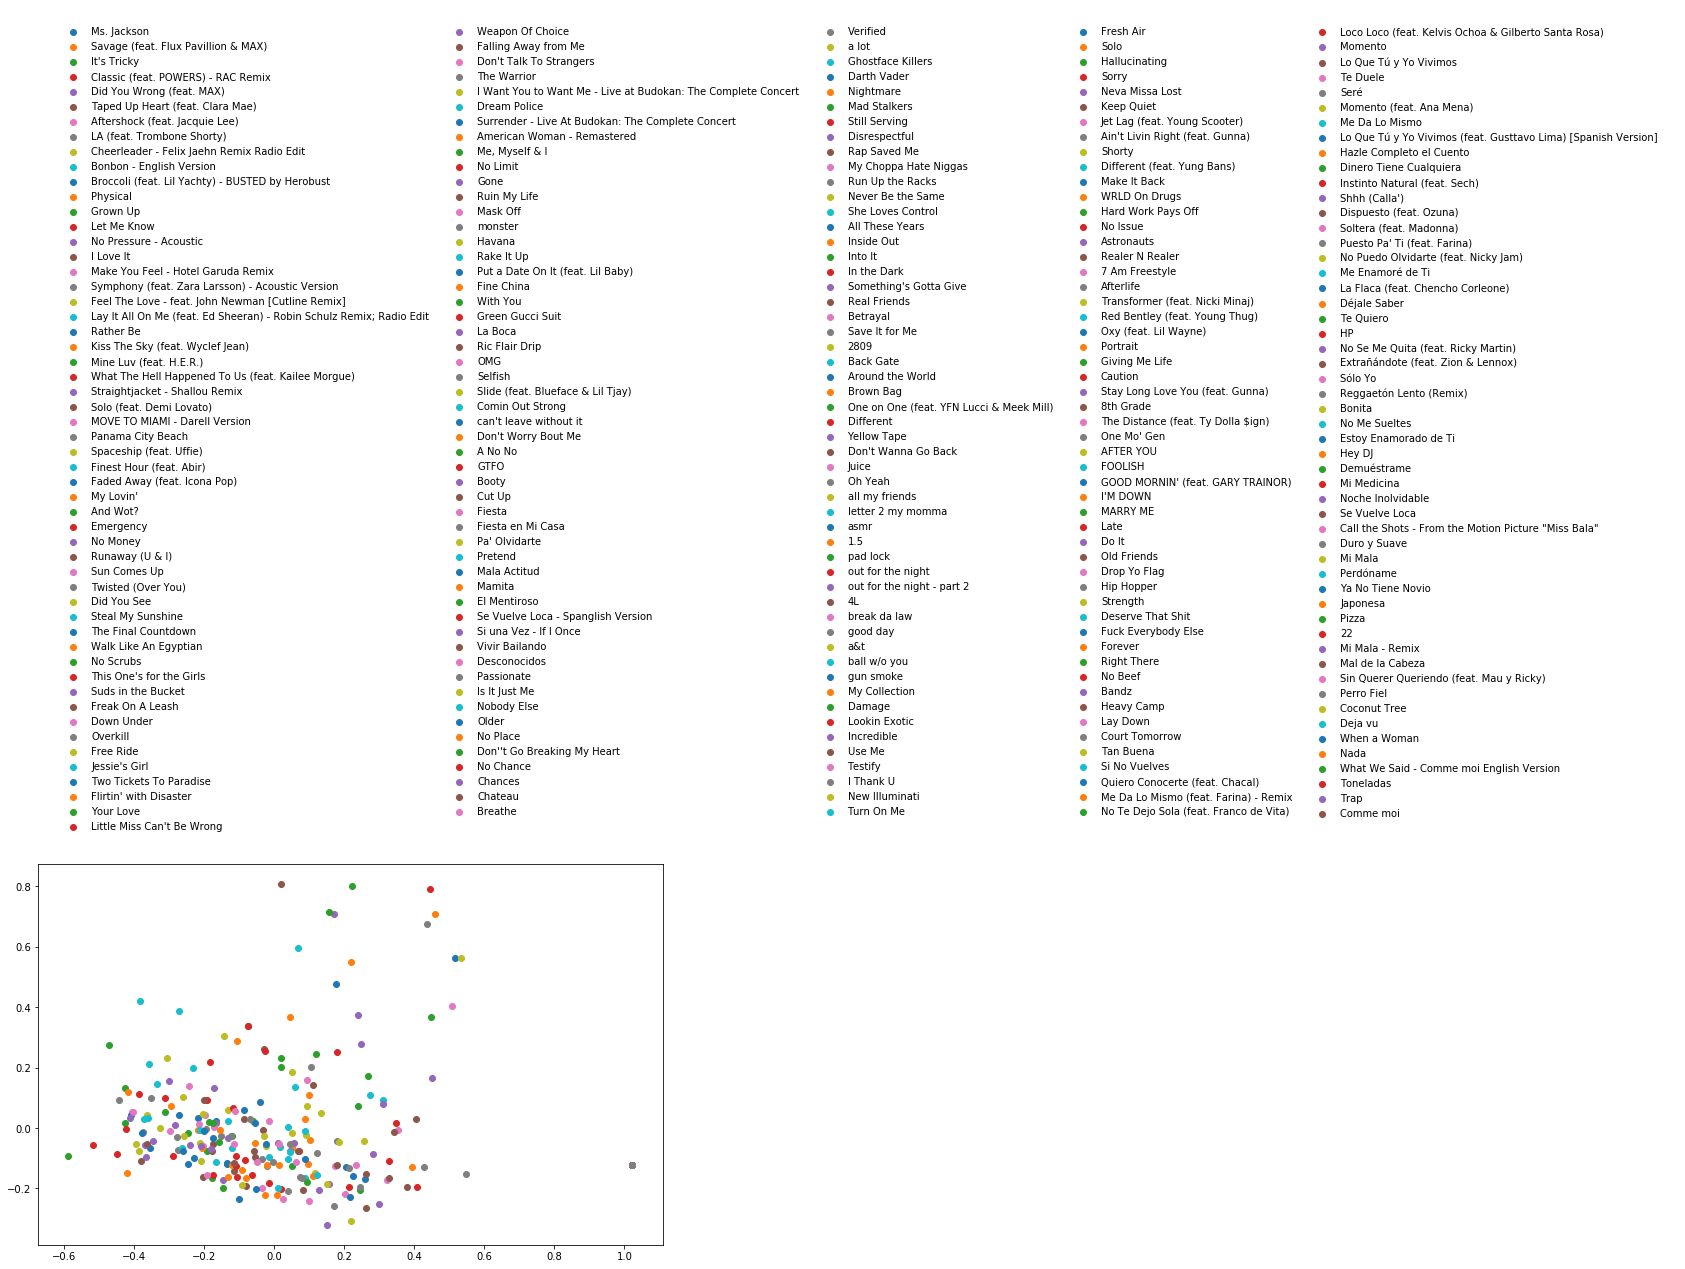

In [32]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline
pca = PCA(n_components=2)
pca.fit(X)

z = pca.transform(X)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7 * 1.6, 7))
for i, vec in enumerate(z):
    ax.scatter(vec[0], vec[1], label=feature_df.dropna().iloc[i].name)
plt.legend(loc="best", ncol=5, bbox_to_anchor=(0, 1.02, 1, 0.102),
          frameon=False, borderpad=2)
plt.show()

In [33]:

with open('processed.pickle', 'wb') as handle:
    pickle.dump(song_data_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [101]:
song_data_dict["""And Wot?"""]['obj']['cm_statistics']

{'num_sp_playlists': 94,
 'num_sp_editorial_playlists': 1,
 'num_am_playlists': 9,
 'num_am_editorial_playlists': 1,
 'num_de_playlists': 0,
 'num_de_editorial_playlists': 0,
 'num_az_playlists': 0,
 'num_az_editorial_playlists': 0,
 'num_yt_playlists': 1,
 'num_yt_editorial_playlists': 1,
 'yt_playlist_total_reach': '416338',
 'sp_popularity': 32,
 'sp_playlist_total_reach': '98901',
 'de_playlist_total_reach': None}